This colab is about using OD-WeaponDetection dataset from DaSCI for knife and gun detection using yolov7

Dataset link: https://github.com/ari-dasci/OD-WeaponDetection 
Related:
https://dasci.es/transferencia/open-data/24705/

Yolov7 GITHUB: https://github.com/WongKinYiu/yolov7

## Setting Environment

In [ ]:
!mkdir Knife_and_gun_detection

In [ ]:
%cd Knife_and_gun_detection/

/content/Knife_and_gun_detection


In [ ]:
#Downloading and unziping dataset
!pip install gdown
!gdown https://drive.google.com/uc?id=1Szc920DAh5kU8Qk38Doq0znEVR1QmTZS
!unzip OD-WeaponDetection-master.zip

In [ ]:
#cloning yolov7 repository
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7
!pip3 install --upgrade pip

Cloning into 'yolov7'...
remote: Enumerating objects: 1157, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1157 (delta 10), reused 15 (delta 8), pack-reused 1139
Receiving objects: 100% (1157/1157), 70.41 MiB | 17.70 MiB/s, done.
Resolving deltas: 100% (498/498), done.
/content/Knife_and_gun_detection/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#installing requirements for yolov7 training
!pip3 install -r requirements.txt
!sudo apt install -y zip htop screen libgl1-mesa-glx

## Pre Processing

Yolo format annotation: **object-class x y width height**
<br>
**object-class** will be given by a number representing the class. Ex: knife: 0 and gun: 1. If it's a knife, only the number 0 will be given, no strings.
<br>
**x** is the percentage relative to width where the center of the object is.
<br>
**y** is the percentage relative to height where the center of the object is.
<br>
**width** is the percentage that the width of the object represents to the image
<br>
**height** is the percentage that the height of the object represents to the image

So, if we have 3 different objects (0: knife, 1: gun and 4: pencil) in the image 1.png, we will have the label as 1.txt having the following:
<br>
<br>
0 0.34 0.45 0.12 0.10
<br>
1 0.12 0.20 0.15 0.16
<br>
4 0.70 0.45 0.20 0.30
<br>
<br>
<br>
please, ignore the exemple proportions

### Already has the labels

The dataset already comes with the objects labels, but it's in pascal voc xml format, we need just to convert to yolo txt format. 

**Method 1** By code

Code for conversion from https://towardsdatascience.com/convert-pascal-voc-xml-to-yolo-for-object-detection-f969811ccba5

In [ ]:
%cd ..

/content/Knife_and_gun_detection


In [ ]:
import xml.etree.ElementTree as ET
import glob
import os
import json

In [ ]:
!mkdir dataset/

In [ ]:
!mkdir dataset/labels/

Just adjust input_dir, output_dir and image_dir to the correct directories

In [ ]:
def xml_to_yolo_bbox(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]


def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center width heigth
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    return [xmin, ymin, xmax, ymax]


classes = []
input_dir = "OD-WeaponDetection-master/Knife_detection/annotations/"
output_dir = "dataset/labels/"
image_dir = "OD-WeaponDetection-master/Knife_detection/Images/"

# create the labels folder (output directory)
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

# identify all the xml files in the annotations folder (input directory)
files = glob.glob(os.path.join(input_dir, '*.xml'))
print(len(files))
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f"{filename}.jpg")):
        print(f"{filename} image does not exist!")
        continue

    result = []

    # parse the content of the xml file
    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)

    for obj in root.findall('object'):
        index = 0
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)
        # convert data to string
        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")

    if result:
        # generate a YOLO format text file for each xml file
        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding="utf-8") as f:
            f.write("\n".join(result))

# generate the classes file as reference
with open('classes.txt', 'w', encoding='utf8') as f:
    f.write(json.dumps(classes))

Repeating to contemplate the pistols

In [ ]:
classes = []
input_dir = "OD-WeaponDetection-master/Pistol\ detection/xmls/"
output_dir = "dataset/labels/"
image_dir = "OD-WeaponDetection-master/Pistol\ detection/Weapons"

# create the labels folder (output directory)
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

# identify all the xml files in the annotations folder (input directory)
files = glob.glob(os.path.join(input_dir, '*.xml'))
print(len(files))
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f"{filename}.jpg")):
        print(f"{filename} image does not exist!")
        continue

    result = []

    # parse the content of the xml file
    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)

    for obj in root.findall('object'):
        index = 1
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)
        # convert data to string
        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")

    if result:
        # generate a YOLO format text file for each xml file
        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding="utf-8") as f:
            f.write("\n".join(result))

# generate the classes file as reference
with open('classes.txt', 'w', encoding='utf8') as f:
    f.write(json.dumps(classes))

0


Moving images to the dataset folder

In [ ]:
!mkdir dataset/images/

In [ ]:
import shutil
for file in enumerate(os.listdir('/content/Knife_and_gun_detection/OD-WeaponDetection-master/Knife_detection/Images')):
  path = '/content/Knife_and_gun_detection/OD-WeaponDetection-master/Knife_detection/Images/' + file[1]
  shutil.move(path, '/content/Knife_and_gun_detection/dataset/images/')

In [ ]:
for file in enumerate(os.listdir('/content/Knife_and_gun_detection/OD-WeaponDetection-master/Pistol detection/Weapons')):
  path = '/content/Knife_and_gun_detection/OD-WeaponDetection-master/Pistol detection/Weapons/' + file[1]
  shutil.move(path, '/content/Knife_and_gun_detection/dataset/images/')

**Method 2** Roboflow website (easy method)

https://roboflow.com/

You can drag and drop the folders to roboflow interface and it will give the option to export it to yolo format

### Do not have the labels

You can manually check the values and create the txt file, but it will consume too much time.
<br>
I recommend the use of a tool like in Roboflow (https://roboflow.com/) that can grab the selection of object and generate the values.

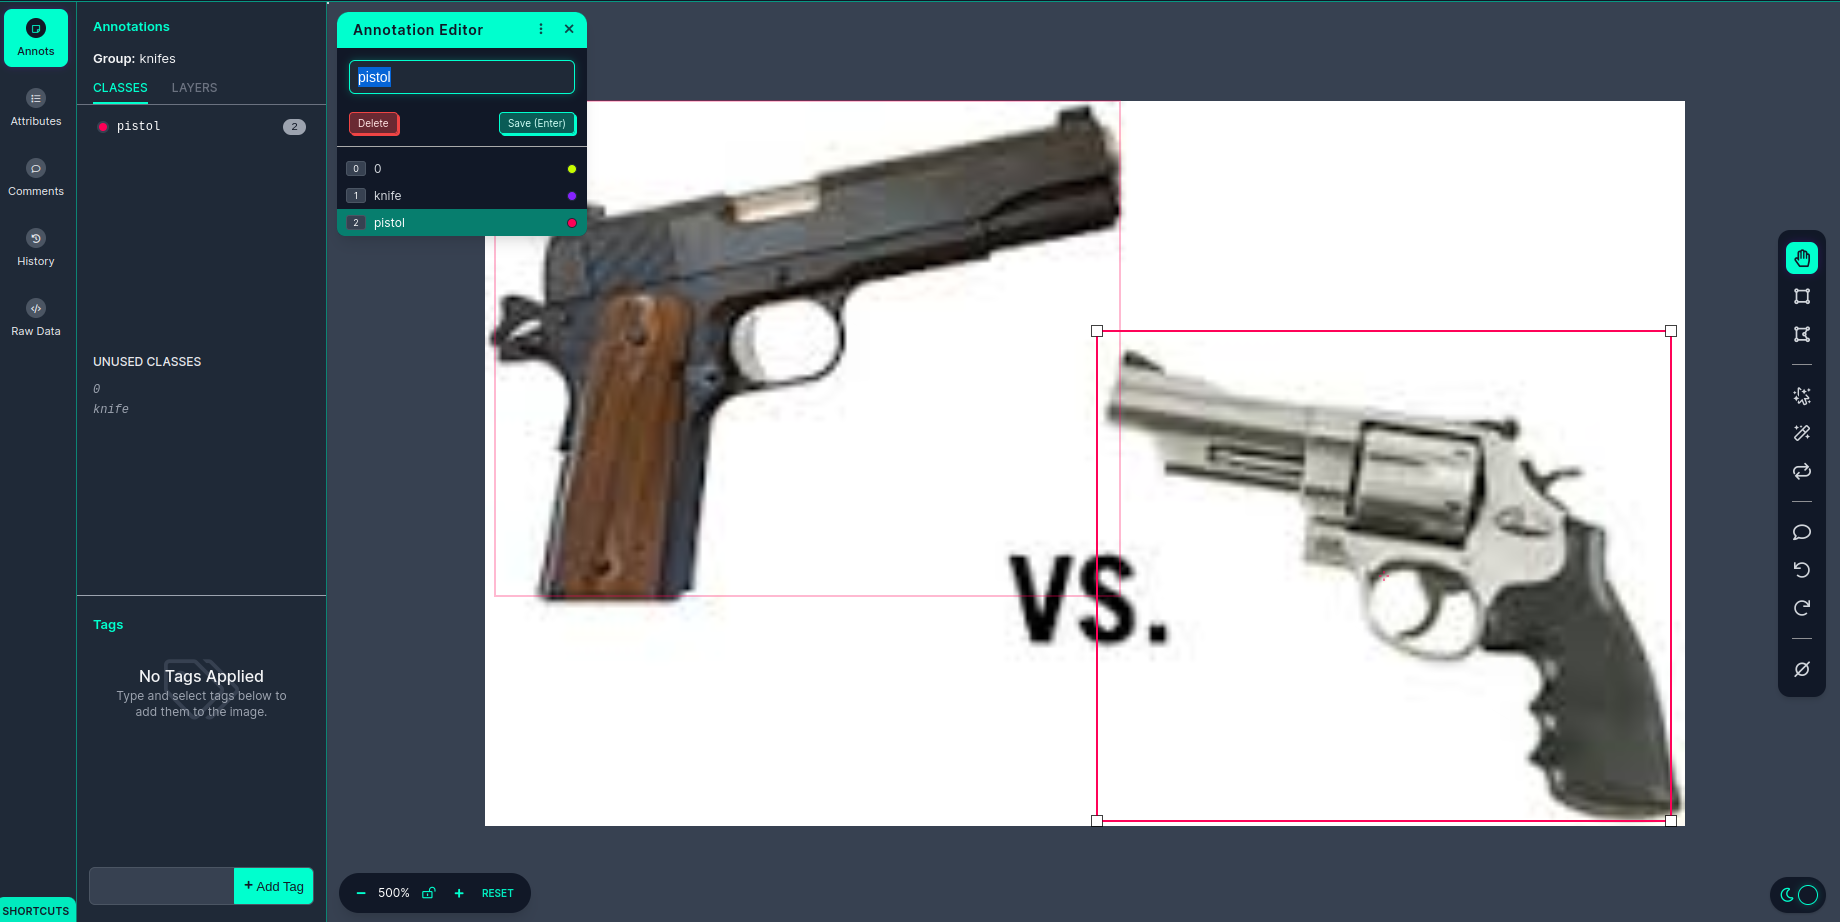

As you can see we, with the uploaded image you can select the portion of the image and label it.

### Splitting Folders

In [ ]:
!pip3 install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio("dataset", output="dataset",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 7026 files [00:10, 651.69 files/s]


### Generating yaml custom file

For a custom training we need a .yaml file containing the location of images, or to a txt containing the location of each image, the number of classes and all the classes contemplated.
<br>
In this case we will be using a txt file containing the location of each image:
<br>
<br>
train: ./dataset/train.txt
<br>
test: ./dataset/test.txt
<bR>
val: ./dataset/val.txt
<br>
nc: 1
<br>
names: ['knife', 'pistol']

In [ ]:
%cd yolov7

/content/Knife_and_gun_detection/yolov7


In [ ]:
!pip install ruamel.yaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 32.3 MB/s eta 0:00:00


In [ ]:
from ruamel import yaml

with open('data/custom.yaml', 'w') as yaml_file:
  yaml.preserve_quotes=True
  yaml.explicit_start = True
  yaml.explicit_end=True
  yaml_str = '''\
train: ./dataset/train.txt
test: ./dataset/test.txt
val: ./dataset/val.txt
nc: 2
names: ['knife', 'pistol']'''
  data = yaml.load(yaml_str, Loader=yaml.Loader)
  yaml.dump(data, yaml_file)

Open custom.yaml in yolov7/data/ and add commas to the classes names, as in:
<br>
<br>
train: ./dataset/train.txt
<br>
test: ./dataset/test.txt
<br>
val: ./dataset/val.txt
<br>
nc: 2
<br>
names: ['knife', 'pistol']

### Yolo directory format

You need to check if it's in the yolo folder format.
<br>
The order is dataset/images/training, dataset/images/test, dataset/images/val, dataset/labels/training and dataset/labels/val

In [ ]:
%cd ..

/content/Knife_and_gun_detection


In [ ]:
shutil.move('dataset/train/images', 'yolov7/dataset/images/train')
shutil.move('dataset/train/labels', 'yolov7/dataset/labels/train')
shutil.move('dataset/test/images', 'yolov7/dataset/images/test')
shutil.move('dataset/val/images', 'yolov7/dataset/images/val')
shutil.move('dataset/val/labels', 'yolov7/dataset/labels/val')

'yolov7/dataset/labels/val'

### Creating the .txt file with all the image locations

In [ ]:
%cd yolov7/dataset

/content/Knife_and_gun_detection/yolov7/dataset


In [ ]:
from PIL import Image

In [ ]:
with open('train.txt', 'w') as f:
  for files in os.listdir('images/train/'):
    basename = os.path.basename(files)
    f.write('./images/train/'+basename+'\n')

In [ ]:
with open('test.txt', 'w') as f:
  for files in os.listdir('images/test/'):
    basename = os.path.basename(files)
    f.write('./images/test/'+basename+'\n')

In [ ]:
with open('val.txt', 'w') as f:
  for files in os.listdir('images/val/'):
    basename = os.path.basename(files)
    f.write('./images/val/'+basename+'\n')

## Training

First, if using colab for training, enable gpu.
<br>
If using local host, just run and readjust parameters according to your gpu and processor capabilities.

In [ ]:
%cd ..

Custom parameters for training

Download weights from Transfer Learning section in https://github.com/WongKinYiu/yolov7 and add to your yolov7 directory

In [ ]:
!python3 train.py --workers 12 --device 0 --batch-size 6 --data data/custom.yaml --img 640 640 --cfg cfg/training/yolov7.yaml --weights 'yolov7_training.pt' --name yolov7-custom --hyp data/hyp.scratch.custom.yaml --epochs 250

Testing with Pistol_classification images from DaSCI dataset

In [ ]:
%cd ..

In [ ]:
!python3 yolov7/detect.py --weights yolov7/runs/train/yolov7-custom/weights/best.pt --con 0.25 --img-size 640 --source OD-WeaponDetection-master/Pistol_classification/AAAPistol/

## First Attempt Results

[Weights for 200 epochs](https://drive.google.com/file/d/1l0o0slCt1e2NpnVb5XrNSS7v9Ospaer3/view?usp=share_link)

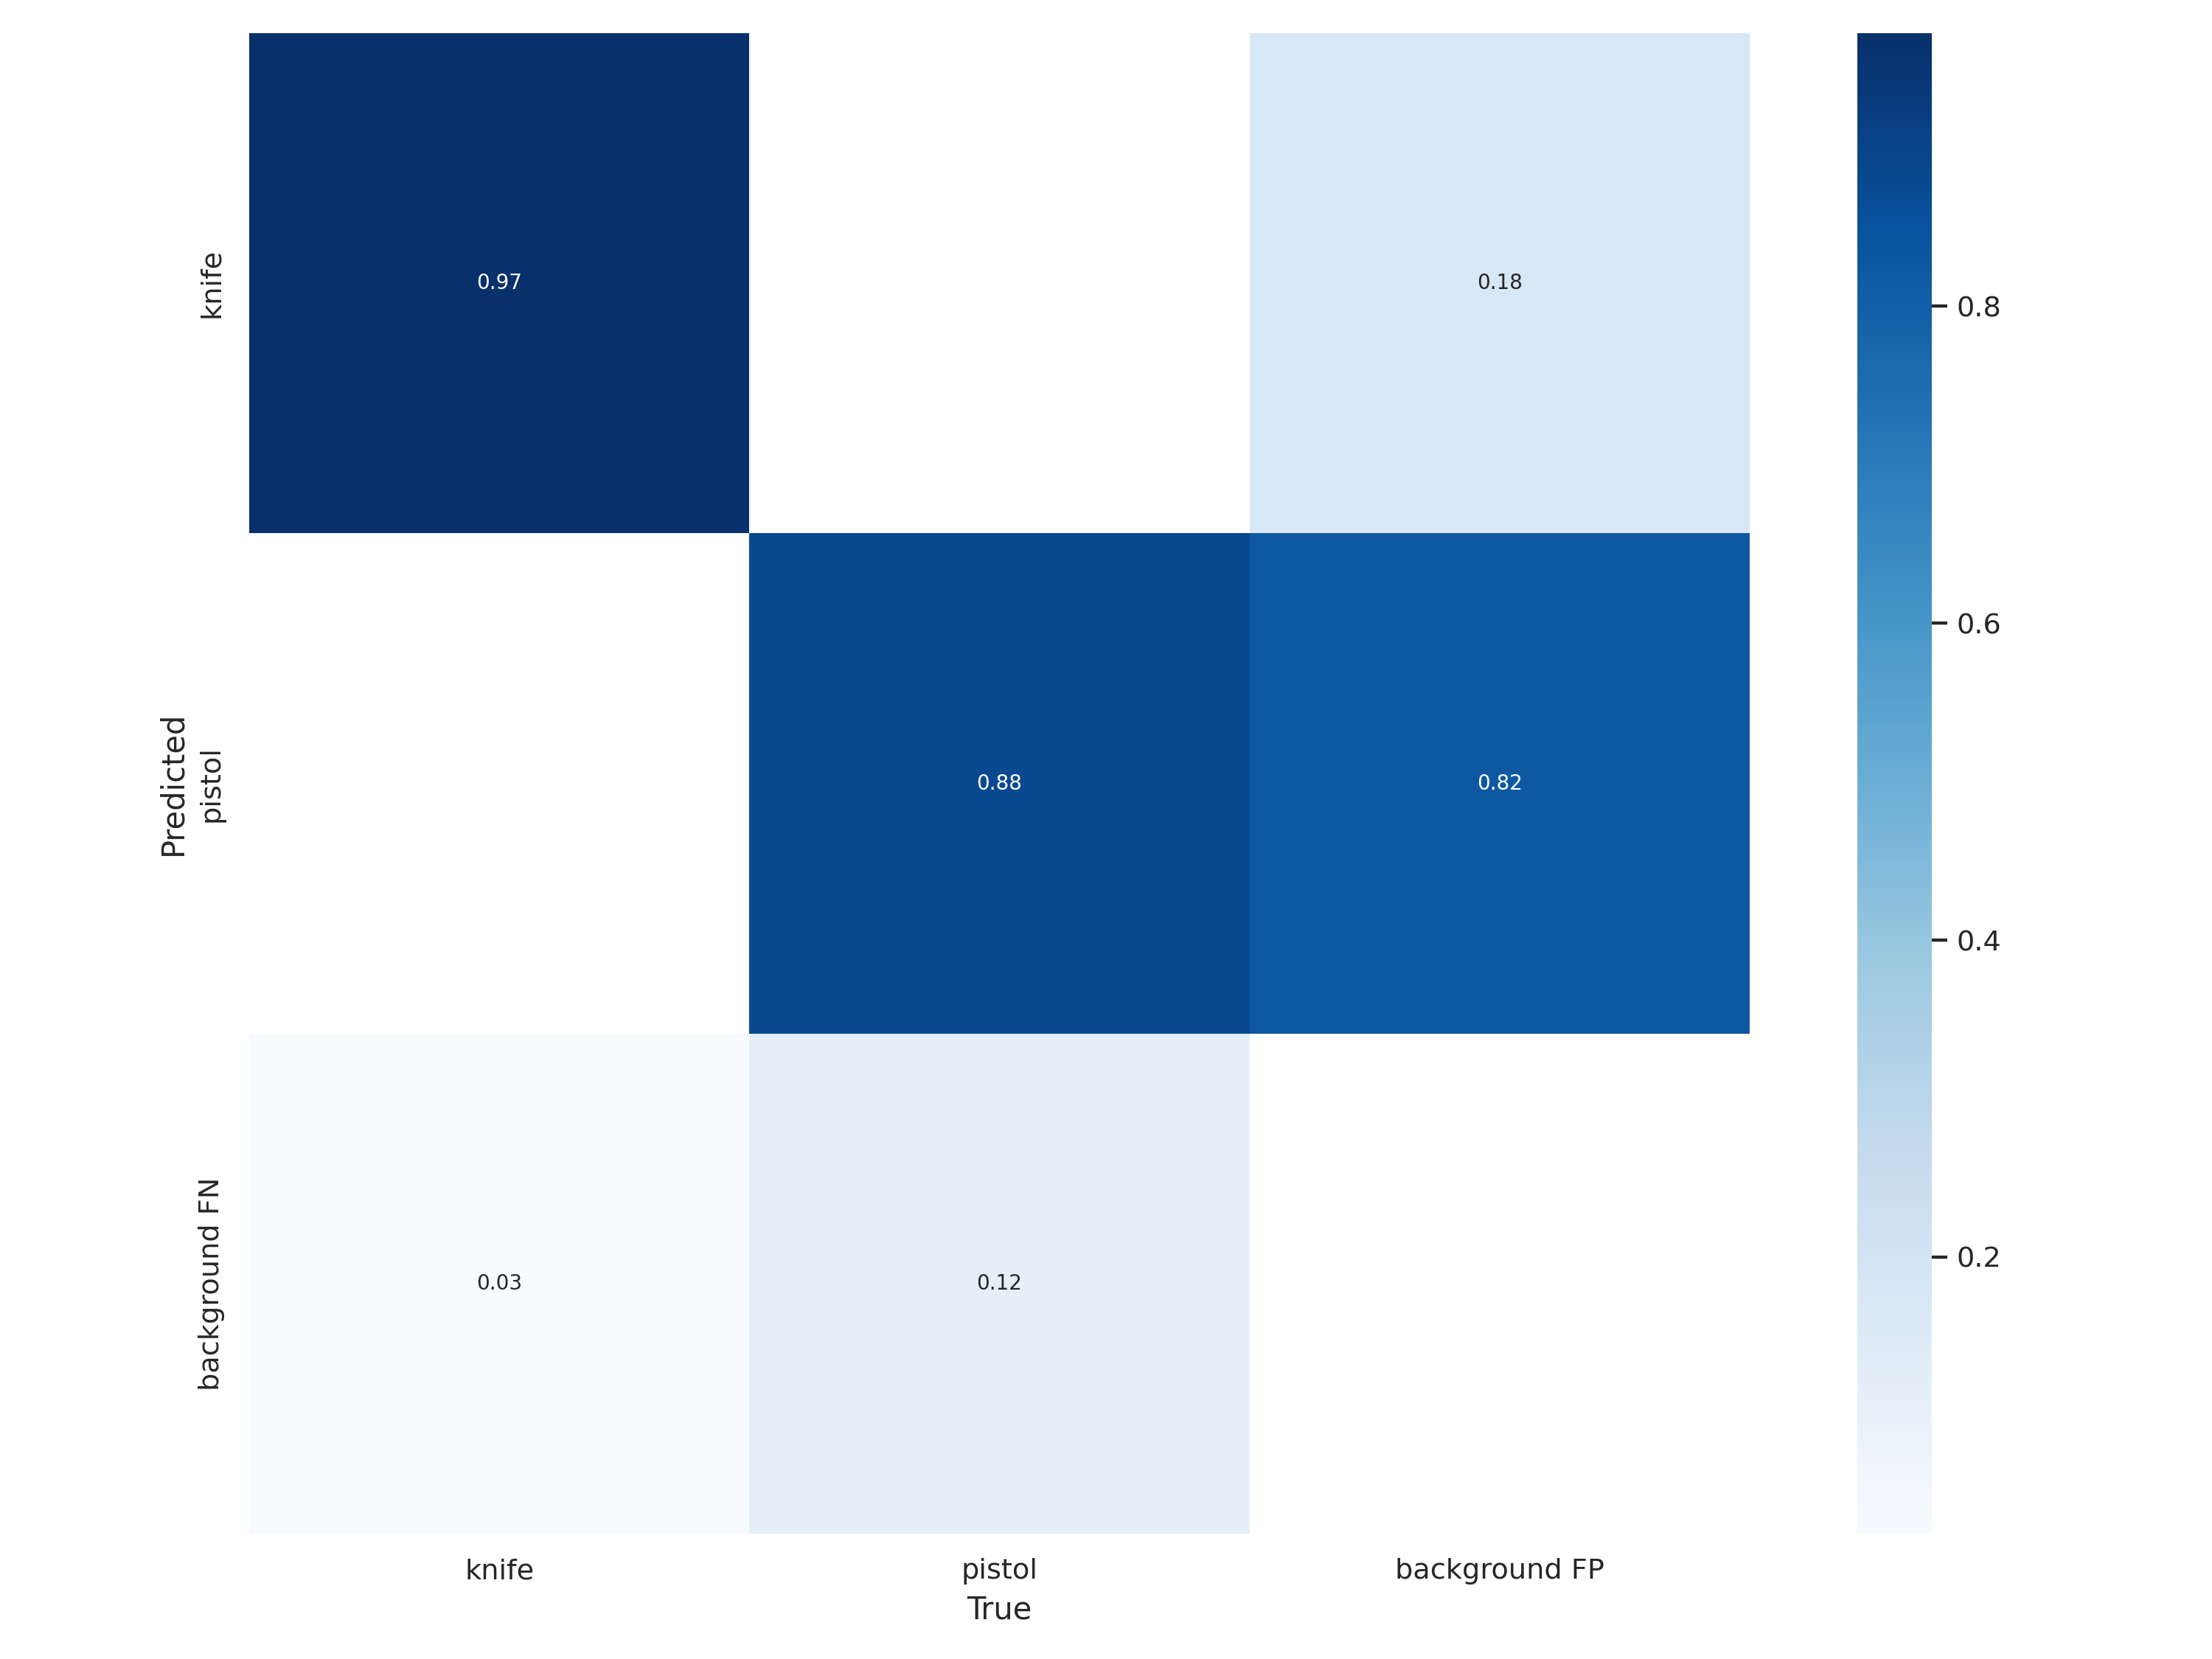

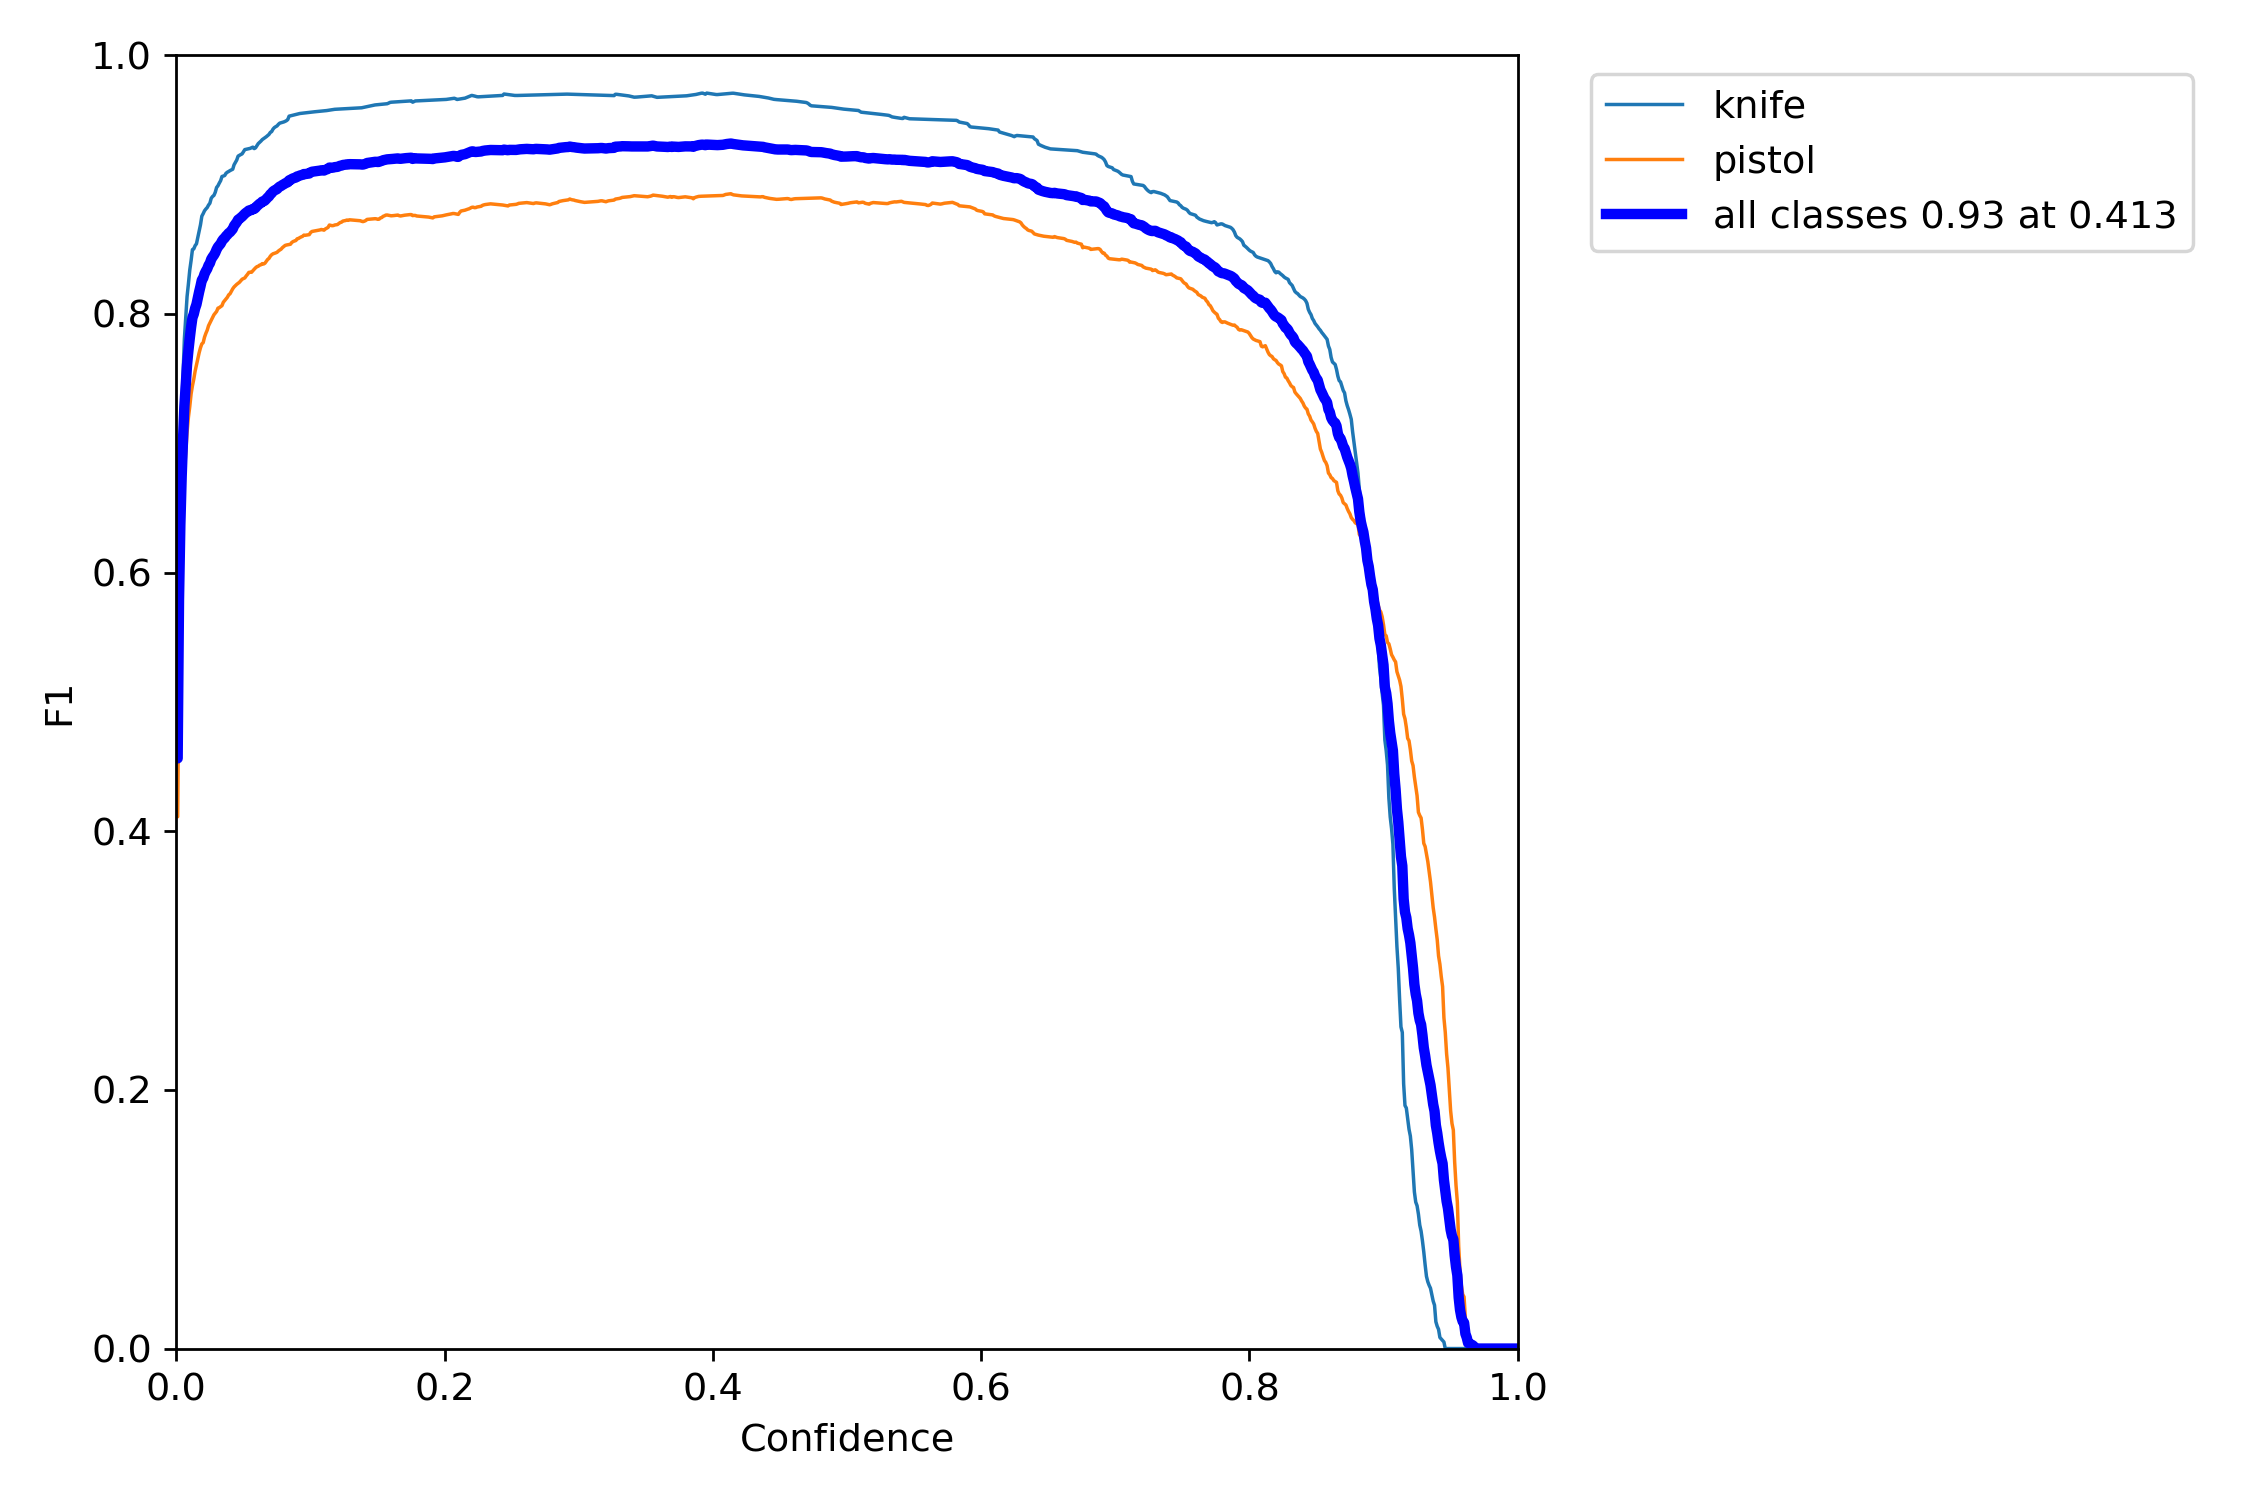

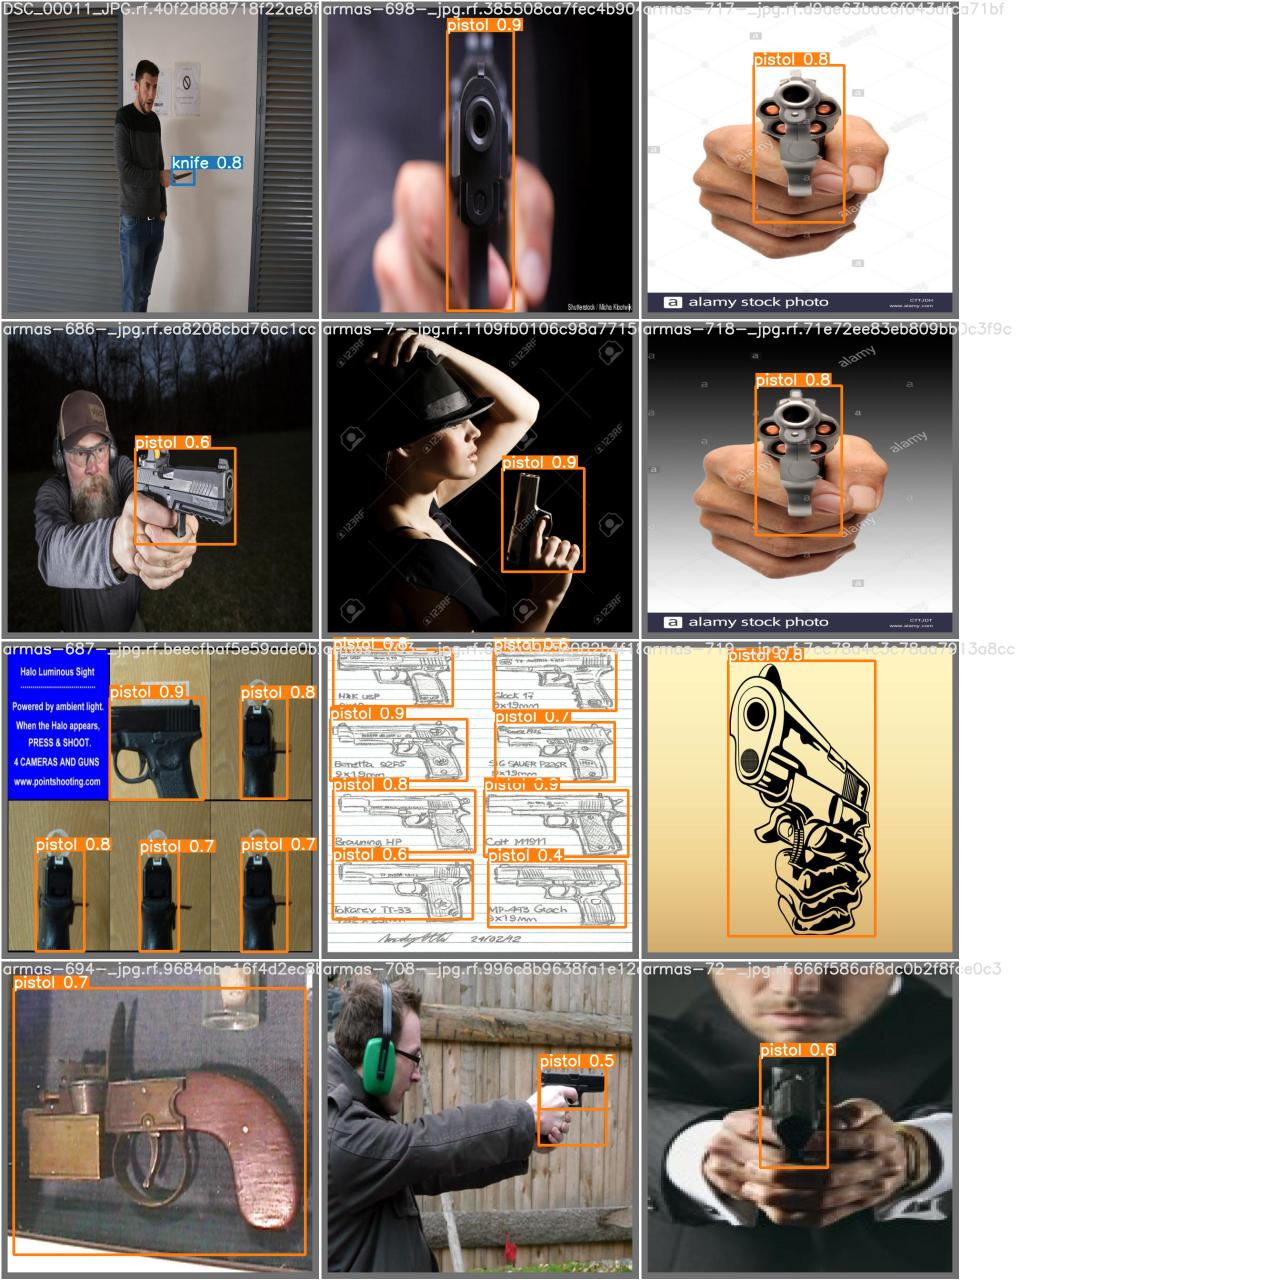